<a href="https://colab.research.google.com/github/mumbimuthiga/data_handling/blob/main/datacleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
file=files.upload()

Saving Housing.csv to Housing.csv


In [3]:
import pandas as pd
housing=pd.read_csv("/content/Housing.csv")
housing.head()

housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
from sklearn.preprocessing import MinMaxScaler;

#Standardize the data using Minmaxscaler does be between (0-1)
num_features=['price','area','bedrooms','bathrooms','stories']

scaler=MinMaxScaler();
housing[num_features]=scaler.fit_transform(housing[num_features])
housing.head()




,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,2,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,3,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,2,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,3,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,2,no,furnished


In [11]:
from sklearn.preprocessing import StandardScaler;

#Standardize the numerical data using standardscaler should not be greater than standard deviation

num_features=['price','area','bedrooms','bathrooms','stories']
scaler=StandardScaler();
housing[num_features]=scaler.fit_transform(housing[num_features])
housing.head()

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 55.5+ KB


In [12]:
#Label encoding (changing values from strings to numerical)
from sklearn.preprocessing import LabelEncoder;

categorical_features=['mainroad','guestroom','basement','hotwaterheating','airconditioning',
                      'prefarea','furnishingstatus']
encoder=LabelEncoder();
for col in categorical_features:
  housing[col]=encoder.fit_transform(housing[col])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,2,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,3,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,2,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,3,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,2,0,0


In [16]:
from scipy import stats
import numpy as np

# Selecting a numerical column for outlier detection
z_scores = stats.zscore(housing[num_features].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
house_df_no_outliers = housing[filtered_entries]
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,2,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,3,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,2,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,3,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,2,0,0


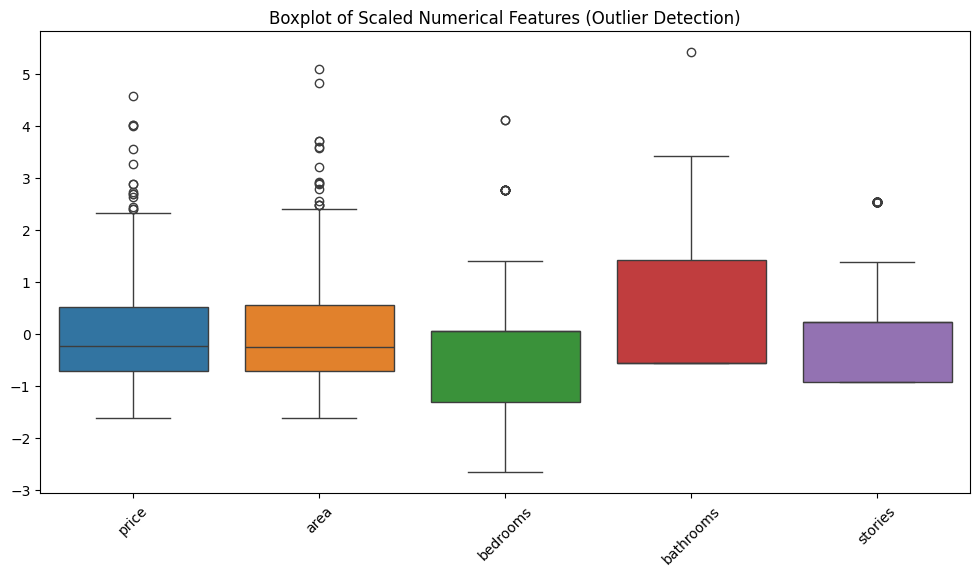

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=housing[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Numerical Features (Outlier Detection)")
plt.show()

In [20]:
# Apply clipping per column to handle outliers
import seaborn as sns
import matplotlib.pyplot as plt
for col in num_features:
    housing[col] = housing[col].clip(lower_bound[col], upper_bound[col])

# Replot boxplot to confirm outliers are treated
plt.figure(figsize=(12, 6))
sns.boxplot(data=house_df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")

NameError: name 'lower_bound' is not defined

In [21]:
# Aggregating data by bedrooms
bedroom_agg = housing.groupby("bedrooms").mean()

# Aggregating data by stories
stories_agg = housing.groupby("stories").mean()

# Aggregating data by furnishing status
furnishing_agg = housing.groupby("furnishingstatus").mean()

# Display summarized trends
bedroom_agg

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
bedrooms,,,,,,,,,,,,
-2.665004,-1.099269,-0.664411,-0.570187,-0.929397,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
-1.308863,-0.607210,-0.237210,-0.453010,-0.734268,0.852941,0.117647,0.250000,0.036765,0.161765,0.492647,0.117647,1.205882
0.047278,0.100533,0.035089,-0.038987,0.147490,0.870000,0.193333,0.390000,0.046667,0.356667,0.723333,0.293333,1.070000
1.403419,0.515341,0.199028,0.666949,0.576625,0.863158,0.221053,0.357895,0.042105,0.421053,0.915789,0.242105,0.884211
2.759560,0.563524,0.526236,1.023412,0.224410,0.600000,0.200000,0.600000,0.200000,0.300000,0.600000,0.100000,1.000000
4.115701,0.013255,-0.553717,0.425813,0.224410,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000
